In [16]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [17]:
data_path = os.path.join('ex2', 'ex2data1.txt')

with open(data_path, 'r') as f:
    data = np.array([[float(item) for item in row.split(',')] for row in f.read().strip().split('\n')])
X, y = data[:, :-1], data[:, -1].astype(int)

print(X1.shape)
print(y1.shape)

(100, 2)
(100,)


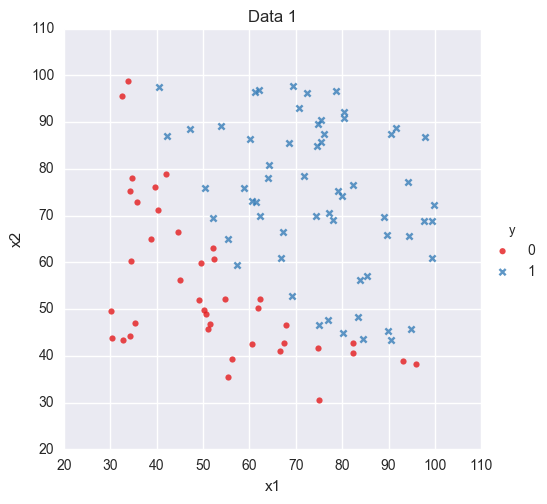

In [18]:
df1 = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
df1['y'] = df1['y'].astype('int')
sns.lmplot(x='x1', y='x2', hue='y', data=df1, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data 1')

In [19]:
# Sigmoid / Logistic Function
def g(x):
    return 1 / (1 + np.e ** (-x))

# Logistic Regression Hypothesis Function
def h(X, theta):
    return g(X.dot(theta))

# Logistic Regression Cost Function
def cost(X, y, theta):
    return (-1 / len(X)) * sum(y*np.log(h(X, theta)) + (1-y)*np.log(1-h(X, theta)))

def update_theta(X, y, theta, alpha):
    return theta - (alpha / len(X)) * X.T.dot(h(X, theta) - y)

In [20]:
X = np.concatenate((np.ones(X.shape[0])[:, None], X), axis=1)
theta = np.zeros(X.shape[1])
for x in range(1000000):
    theta = update_theta(X, y, theta, alpha=0.1)
    
print(theta)

[-557.82686435    4.82062407    4.74168239]


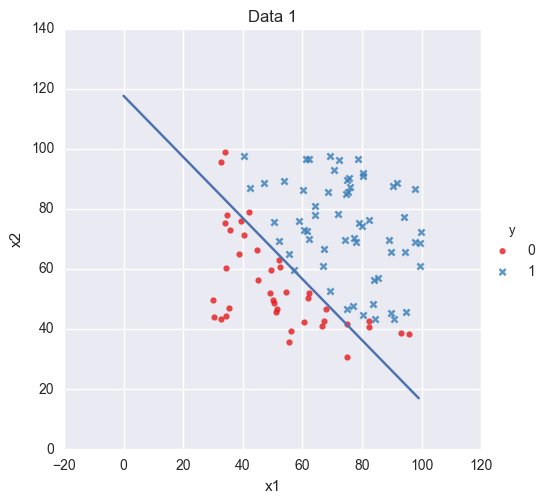

In [21]:
sns.lmplot(x='x1', y='x2', hue='y', data=df1, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data 1')
lineplot = [(-theta[0]-theta[1]*x)/theta[2] for x in range(100)]
plt.plot(lineplot)

In [22]:
cost(X, y, theta)

nan

In [23]:
class Normalizer:

    def __init__(self):
        self.X = None
        self.X_transformed = None
        self.X_mean = None
        self.X_stdev = None

    def fit(self, X):
        self.X = X
        self.X_mean = self.X.mean(axis=0)
        self.X_mean[0] = 0
        self.X_stdev = self.X.std(axis=0)
        self.X_stdev[0] = 1
        self.X_transformed = (self.X - self.X_mean) / self.X_stdev

    def fit_transform(self, X):
        self.fit(X)
        return self.X_transformed

    def get_transformed(self):
        return self.X_transformed
    
    def transform(self, X):
        return (X - self.X_mean) / self.X_stdev
    
    def unfit_theta(self, theta):
        """
        Converts the parameters from the normalized space back to the original space.
        
        Input: list theta
        Output: list
        
        This equation can be verified by looking at a normalized example [1, (x1 - x1_mean)/x1_std, (x2 - x2_mean)/x2_std, ...],
        multiplying this example by parameters [theta_0, theta_1, theta_2, ...] to get prediction y,
        and then rearranging terms to leave the individual x terms not normalized and all the constants grouped
        under a new theta_0.
        """
        theta_0 = theta[0] - sum(theta[1:]*self.X_mean[1:]/self.X_stdev[1:])
        theta_rest = theta[1:]/self.X_stdev[1:]
        return [theta_0, *theta_rest]

In [27]:
nm = Normalizer()
X_norm = nm.fit_transform(X)

theta_norm = np.zeros(X_norm.shape[1])
for x in range(1000000):
    theta_norm = update_theta(X_norm, y, theta_norm, alpha=0.1)
    
print(theta_norm)

print(cost(X_norm, y, theta_norm))

[ 1.71844948  3.99278759  3.72513649]
0.203497701589


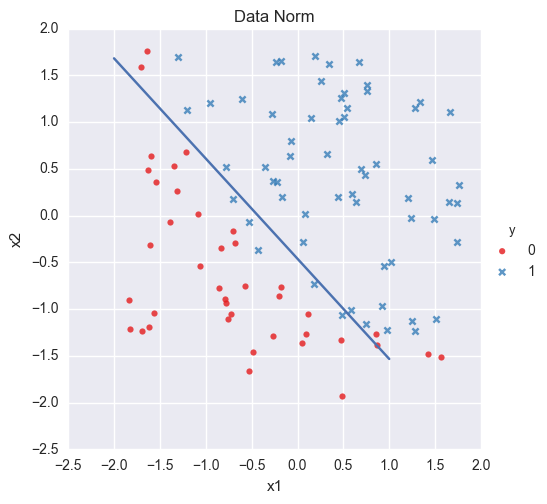

In [31]:
data_norm = np.concatenate((X_norm[:, 1:], y[:, None]), axis=1)
df_norm = pd.DataFrame(data_norm, columns=['x1', 'x2', 'y'])
df_norm['y'] = df_norm['y'].astype('int')

sns.lmplot(x='x1', y='x2', hue='y', data=df_norm, fit_reg=False, markers=["o", "x"], palette="Set1")
plt.title('Data Norm')
lineplot = [(-theta_norm[0]-theta_norm[1]*x)/theta_norm[2] for x in range(-2,2)]
plt.plot(range(-2,2), lineplot)